In [88]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [89]:
from tensorflow.keras.datasets import reuters
# Reading in Data
dict_size = 10000
(train_input, train_label), (test_input, test_label) = reuters.load_data(num_words = dict_size)

In [90]:
# Vectorizing Data

def vectorize_data(data, dict_size):
  encoded_data = np.zeros((len(data), dict_size))
  for i, word_indices in enumerate(data):
    for word_index in word_indices:
      encoded_data[i, word_index] = 1
  return encoded_data

def one_hot_encode(labels, dim):
  encoded_labels = np.zeros((len(labels), dim))
  for i, label in enumerate(labels):
    encoded_labels[i, label] = 1
  return encoded_labels

X_train = vectorize_data(train_input, dict_size)
X_test = vectorize_data(test_input, dict_size)
# y_train = one_hot_encode(train_label, 46)
# y_test = one_hot_encode(test_label, 46)
y_train = np.array(train_label)
y_test = np.array(test_label)

In [91]:
from tensorflow import keras
from tensorflow.keras import layers

# Defining model
model = keras.Sequential(
    [
        layers.Dense(128, activation="relu"),
        layers.Dense(46, activation="softmax")
    ]
)

In [92]:
# Defining compilation (optimizer, loss, metrics)
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=['Accuracy']
)

In [93]:
# Splitting between training & testing
X_val = X_train[:1000]
y_val = y_train[:1000]
X_train = X_train[1000:]
y_train = y_train[1000:]

In [94]:
# Fitting Model
num_epochs = 4
history = model.fit(X_train, y_train, 512, num_epochs, validation_data = [X_val, y_val])

Epoch 1/4
16/16 [==============================] - 2s 116ms/step - loss: 2.3766 - Accuracy: 0.5613 - val_loss: 1.6042 - val_Accuracy: 0.6740
Epoch 2/4
16/16 [==============================] - 1s 93ms/step - loss: 1.3193 - Accuracy: 0.7323 - val_loss: 1.2112 - val_Accuracy: 0.7380
Epoch 3/4
16/16 [==============================] - 2s 95ms/step - loss: 0.9664 - Accuracy: 0.8017 - val_loss: 1.0518 - val_Accuracy: 0.7830
Epoch 4/4
16/16 [==============================] - 3s 163ms/step - loss: 0.7553 - Accuracy: 0.8459 - val_loss: 0.9355 - val_Accuracy: 0.8090


<ipython-input-95-6e7a47ecaba3>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, training_loss, "bo", label="Training Loss", c="orange")


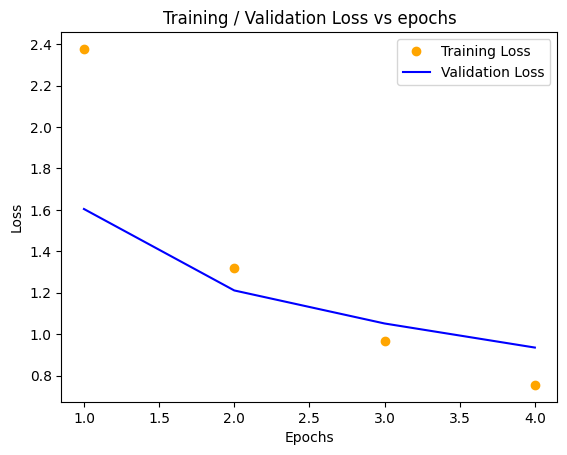

In [95]:
training_loss = history.history['loss']
training_val_loss = history.history['val_loss']
epochs = np.arange(1, num_epochs + 1)

plt.plot(epochs, training_loss, "bo", label="Training Loss", c="orange")
plt.plot(epochs, training_val_loss, "b", label="Validation Loss")
plt.title("Training / Validation Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])


<ipython-input-96-12bb890b68dc>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, training_acc, "bo", label="Training Accuracy", c="orange")


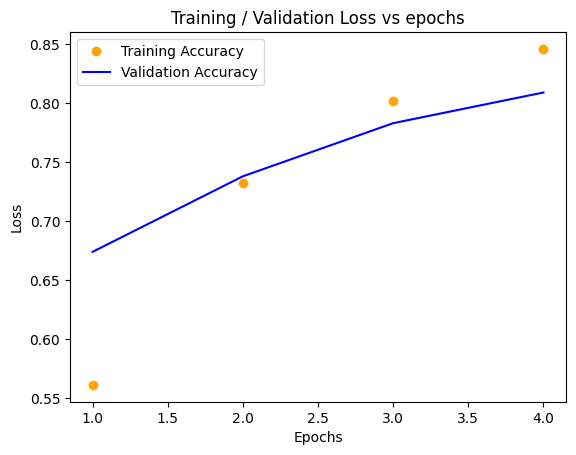

In [96]:
print(history.history.keys())
training_acc = history.history['Accuracy']
training_acc_loss = history.history['val_Accuracy']
epochs = np.arange(1, num_epochs + 1)

plt.plot(epochs, training_acc, "bo", label="Training Accuracy", c="orange")
plt.plot(epochs, training_acc_loss, "b", label="Validation Accuracy")
plt.title("Training / Validation Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [97]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 1s 7ms/step - loss: 1.0030 - Accuracy: 0.7827


[1.0030033588409424, 0.7827248573303223]

In [98]:
predictions = model.predict(X_test)
np.argmax(predictions[0])

71/71 [==============================] - 1s 6ms/step


3